# Random Forest

Random forest is a Supervised Machine Learning Algorithm that is used widely in Classification and Regression problems.

It provides higher accuracy through cross validation. Random forest classifier will handle the missing values and maintain the accuracy of a large proportion of data.
Random Forest grows multiple decision trees which are merged together for a more accurate prediction.

In [56]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder

In [57]:
df = pd.read_csv('Company_Data (2).csv')
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [58]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [59]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [61]:
df.shape

(400, 11)

In [62]:
#finding NA values
df.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [63]:
#finding the value of each rows

df['Sales'].value_counts()

7.80    4
6.20    3
6.67    3
8.77    3
6.88    3
       ..
7.50    1
8.89    1
7.58    1
5.64    1
8.14    1
Name: Sales, Length: 336, dtype: int64

In [64]:
df['ShelveLoc'].value_counts()

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [65]:
df['Urban'].value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

In [66]:
df['US'].value_counts()

Yes    258
No     142
Name: US, dtype: int64

In [67]:
df['Advertising'].value_counts()

0     144
10     25
11     22
13     20
5      19
7      16
12     16
3      14
4      12
15     12
16     11
14     11
8      11
9      10
2       9
1       8
19      8
6       7
17      6
18      6
20      4
22      2
23      2
21      1
24      1
25      1
26      1
29      1
Name: Advertising, dtype: int64

In [68]:
df.Sales.mean()

7.496325

In [69]:
# making data in to categotical form 

df.loc[df["Sales"]>=7.49,"Sale"]="Good"
df.loc[df["Sales"]<=7.49,"Sale"]="Risky"

In [70]:
df.drop('Sales',inplace = True,axis = 1)

In [71]:
df.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sale
0,138,73,11,276,120,Bad,42,17,Yes,Yes,Good
1,111,48,16,260,83,Good,65,10,Yes,Yes,Good
2,113,35,10,269,80,Medium,59,12,Yes,Yes,Good
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Risky
4,141,64,3,340,128,Bad,38,13,Yes,No,Risky


In [72]:
def count_plot(df, columns):
    plt.figure(figsize=(10, 5))
    for i,var  in enumerate(columns):
        plt.subplot(1,2,1)
        g = sns.countplot(df[var])
    plt.tight_layout()
    
features = df.columns.tolist()
features.remove('Sale')
features

['CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

D:\Vish\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-72-c64d4af9d837>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1,2,1)
D:\Vish\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipy

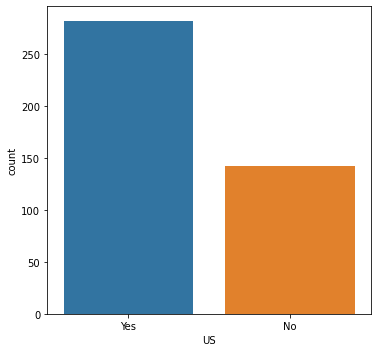

In [73]:
count_plot(df, features)
plt.show()

In [74]:
#ordinal encoder : In ordinal encoding, each unique category value is assigned an integer value.
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder

encoder = OrdinalEncoder()
data_encoded = encoder.fit_transform(df[features])
df_encoded = pd.DataFrame(data_encoded,columns = features)

data_encoded

array([[49., 51., 11., ...,  7.,  1.,  1.],
       [22., 27., 16., ...,  0.,  1.,  1.],
       [24., 14., 10., ...,  2.,  1.,  1.],
       ...,
       [71.,  5., 12., ...,  8.,  1.,  1.],
       [12., 57.,  7., ...,  2.,  1.,  1.],
       [45., 16.,  0., ...,  6.,  1.,  1.]])

In [75]:
df_encoded.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,49.0,51.0,11.0,141.0,54.0,0.0,17.0,7.0,1.0,1.0
1,22.0,27.0,16.0,129.0,18.0,1.0,40.0,0.0,1.0,1.0
2,24.0,14.0,10.0,138.0,15.0,2.0,34.0,2.0,1.0,1.0
3,28.0,77.0,4.0,249.0,31.0,2.0,30.0,4.0,1.0,1.0
4,52.0,42.0,3.0,178.0,62.0,0.0,13.0,3.0,1.0,0.0


In [76]:
#Label Encoder : LabelEncoder encode labels with a value between 0 and n_classes-1 where n is the number of distinct labels. If a label repeats it assigns the same value to as assigned earlier.

encoder = LabelEncoder()
target_encoded = encoder.fit_transform(df['Sale'])
df_encoded['Sale'] = target_encoded
encoder.inverse_transform(target_encoded)

array(['Good', 'Good', 'Good', 'Risky', 'Risky', 'Good', 'Risky', 'Good',
       'Risky', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Risky',
       'Good', 'Good', 'Good', 'Risky', 'Risky', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Risky',
       'Risky', 'Risky', 'Good', 'Good', 'Risky', 'Risky', 'Risky',
       'Good', 'Risky', 'Risky', 'Good', 'Risky', 'Risky', 'Good',
       'Risky', 'Risky', 'Risky', 'Good', 'Risky', 'Risky', 'Risky',
       'Good', 'Risky', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Risky', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Risky', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Risky',
       'Risky', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Risky',
       'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'Risky', 'R

In [77]:
df_encoded.head(2)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sale
0,49.0,51.0,11.0,141.0,54.0,0.0,17.0,7.0,1.0,1.0,0
1,22.0,27.0,16.0,129.0,18.0,1.0,40.0,0.0,1.0,1.0,0


In [78]:
#feature selection

from sklearn.model_selection import train_test_split

In [79]:
# here X is denoted as metrics and small y denoted as vector

X = df_encoded.iloc[:,:-1]
y = df_encoded['Sale']

In [80]:
X.head(3)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,49.0,51.0,11.0,141.0,54.0,0.0,17.0,7.0,1.0,1.0
1,22.0,27.0,16.0,129.0,18.0,1.0,40.0,0.0,1.0,1.0
2,24.0,14.0,10.0,138.0,15.0,2.0,34.0,2.0,1.0,1.0


In [81]:
y.head(3)

0    0
1    0
2    0
Name: Sale, dtype: int32

In [82]:
#Splitting dataset into train & test split

# using this train and test we prevent the over fitting part of dataseet
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=40)

print("shape of x_train",X_train.shape)
print("shape of x_test",X_test.shape)
print("shape of y_train",y_train.shape)
print("shape of y_test",y_test.shape)

shape of x_train (280, 10)
shape of x_test (120, 10)
shape of y_train (280,)
shape of y_test (120,)


In [83]:
X_train.corr()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
CompPrice,1.000000,-0.093703,-0.042566,-0.118690,0.591577,0.067344,-0.094591,0.132618,0.015650,-0.009706
Income,-0.093703,1.000000,0.040419,-0.023513,-0.077322,-0.095422,0.077886,-0.075636,0.040947,0.068814
Advertising,-0.042566,0.040419,1.000000,0.284928,0.035427,0.021283,0.016741,-0.059276,0.081190,0.682320
Population,-0.118690,-0.023513,0.284928,1.000000,-0.008599,-0.061514,-0.024084,-0.127995,0.005342,0.095635
Price,0.591577,-0.077322,0.035427,-0.008599,1.000000,0.051613,-0.136673,0.145367,0.030451,0.067388
ShelveLoc,0.067344,-0.095422,0.021283,-0.061514,0.051613,1.000000,0.065490,0.034193,-0.028027,-0.071885
Age,-0.094591,0.077886,0.016741,-0.024084,-0.136673,0.065490,1.000000,-0.013719,0.028388,0.066409
Education,0.132618,-0.075636,-0.059276,-0.127995,0.145367,0.034193,-0.013719,1.000000,-0.035718,-0.124564
Urban,0.015650,0.040947,0.081190,0.005342,0.030451,-0.028027,0.028388,-0.035718,1.000000,0.079349
US,-0.009706,0.068814,0.682320,0.095635,0.067388,-0.071885,0.066409,-0.124564,0.079349,1.000000


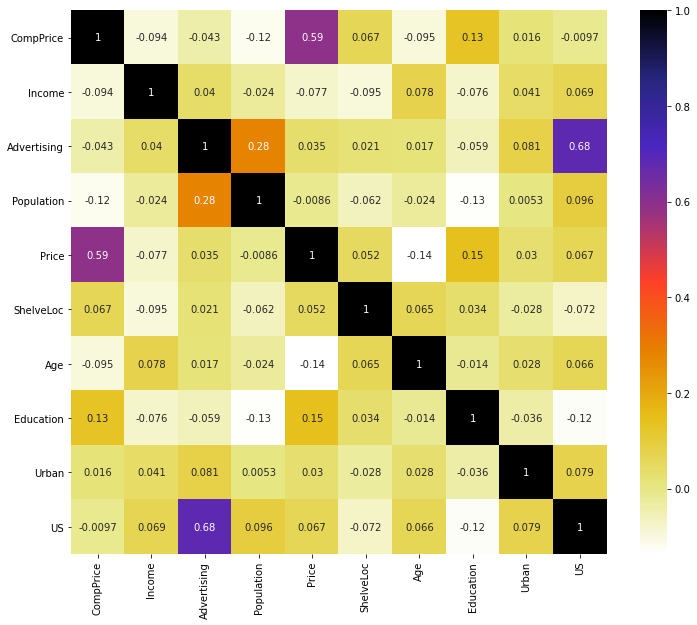

In [84]:
# using pearson correlation,we are doing correlation on X_train dataset. 
plt.figure(figsize=(12,10))
corr = X_train.corr()
sns.heatmap(corr,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [85]:
def correlation(dataset,threshold):
    col_corr = set() 
    corr_metrix = dataset.corr()
    for i in range(len(corr_metrix.columns)):
        for j in range(i):
            if (corr_metrix.iloc[i,j]) > threshold: 
                colnames = corr_metrix.columns[i]  # getting the names of columns
                col_corr.add(colnames)
    return col_corr

In [97]:
corr_features = correlation(X_train,0.8)
len(set(corr_features))

0

In [98]:
X.head(2)

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,49.0,51.0,11.0,141.0,54.0,0.0,17.0,7.0,1.0,1.0
1,22.0,27.0,16.0,129.0,18.0,1.0,40.0,0.0,1.0,1.0


In [99]:
#model building 
#Random Forest

In [100]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier


num_forest = 100
max_features = 3
kfold = KFold(n_splits = 10, random_state = 40, shuffle = True)
model = RandomForestClassifier(n_estimators = num_forest, max_features = max_features)
result = cross_val_score(model, X, y, cv=kfold)

print(result.mean())

0.785


In [101]:
model.fit(X_train, y_train)

RandomForestClassifier(max_features=3)

In [102]:
model.score(X_test, y_test)

0.7583333333333333

In [103]:
#accuracy of train model

model.score(X_train, y_train)

1.0

In [104]:
#Accuracy of train model 100% and #accuracy of test model 76%

In [105]:
y_predict = model.predict(X_test)

In [95]:
from sklearn.metrics import confusion_matrix
result = confusion_matrix(y_test, y_predict)

In [96]:
result             #2 dimensional array

array([[38, 14],
       [17, 51]], dtype=int64)